<a href="https://colab.research.google.com/github/dk-wei/ci_cd_etl_pipeline/blob/main/Prefect_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

教学视频：[Prefect Tutorial - Kevin Fortier
](https://www.youtube.com/watch?v=0IcN117E4Xo)

In [ ]:
!pip install prefect

In [119]:
import csv
import datetime

from prefect import task, Flow, Parameter
from prefect.schedules import IntervalSchedule

@task(max_retries = 5, retry_delay = datetime.timedelta(seconds = 5))  # 如果失败了，会重新尝试5次
def extract(path):
    with open(path, "r")as f:
        text = f.readline().strip()
    data = [int(i) for i in text.split(',')]
    print(data)
    return data

@task
def transform(data):
    tdata = [i**2 for i in data]
    return tdata 

@task
def load(data, path):
    
    with open(path, "w") as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow(data)
    return 

def build_flow(schdule = None):
  
  with Flow('my_etl', schedule=schedule) as flow:

    path1 = Parameter(name = "path1", required = True)
    path2 = Parameter(name = "path2", required = True)
    
    data1 = extract(path1)
    print('data extraction 1 done!')

    tdata = transform(data1)
    print('data transformation done!')

    result = load(tdata, 'tvalues.csv')
    print('loading data done!')

    data2 = extract(path2, upstream_tasks=[tdata])
    print('data extraction 2 done!')

    #extract.set_downstream(result)

    return flow

# 设置scheduler，flow 每隔5s会run一次
schedule = IntervalSchedule(
    start_date = datetime.datetime.now() + datetime.timedelta(seconds = 1),
    interval = datetime.timedelta(seconds = 5)
)


In [120]:
flow = build_flow(schedule)

data extraction 1 done!
data transformation done!
loading data done!
data extraction 2 done!


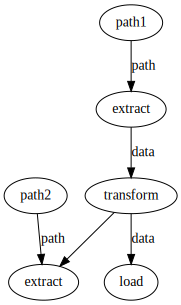

In [121]:
flow.visualize()

In [ ]:
flow.run(
    parameters = {
        "path1": "value1.csv",
        "path2": "value2.csv"
    }
)

[2021-09-17 03:40:03+0000] INFO - prefect.my_etl | Waiting for next scheduled run at 2021-09-17T03:40:06.933804+00:00
[2021-09-17 03:40:06+0000] INFO - prefect.FlowRunner | Beginning Flow run for 'my_etl'
[2021-09-17 03:40:06+0000] INFO - prefect.TaskRunner | Task 'path1': Starting task run...
[2021-09-17 03:40:07+0000] INFO - prefect.TaskRunner | Task 'path1': Finished task run for task with final state: 'Success'
[2021-09-17 03:40:07+0000] INFO - prefect.TaskRunner | Task 'path2': Starting task run...
[2021-09-17 03:40:07+0000] INFO - prefect.TaskRunner | Task 'path2': Finished task run for task with final state: 'Success'
[2021-09-17 03:40:07+0000] INFO - prefect.TaskRunner | Task 'extract': Starting task run...
[1, 2, 3, 4, 5, 6, 7]
[2021-09-17 03:40:07+0000] INFO - prefect.TaskRunner | Task 'extract': Finished task run for task with final state: 'Success'
[2021-09-17 03:40:07+0000] INFO - prefect.TaskRunner | Task 'transform': Starting task run...
[2021-09-17 03:40:07+0000] INFO -